In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

#clustering library
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

#for interactive plots
import plotly.express as px
import plotly.graph_objs as go
from ipywidgets import interact, Dropdown,widgets
import pgeocode

In [320]:
df=pd.read_csv('preprocessed_2017.csv')

In [321]:
df.head()

,zip_code,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,10001,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,10002,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,10003,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,10004,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,10005,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [322]:
df.drop(['Population Density (Per Sq. Mile)'],axis=1,inplace=True)

In [323]:
df.shape

(3195, 20)

In [324]:
df.head()

,zip_code,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,10001,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,10002,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,10003,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,10004,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,10005,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [325]:
df_new=df.copy()

In [326]:
#dropping zipcodes. This is because e dont want to cluster zipocodes in unsuperived clustering. We will concatenate this later to clustered data
df_zipcodes= df_new[['zip_code']]
df_zipcodes.head()

,zip_code
0,10001
1,10002
2,10003
3,10004
4,10005


In [327]:
df_new.drop('zip_code',axis=1,inplace=True)

In [328]:
#scaling the dataset
#from sklearn.preprocessing import StandardScaler


#using min max scaler to scale 'incomePerCapita', 'popDensity' only and bring to the scale of other variables whose range is varying from 0 to 1
from sklearn.preprocessing import MinMaxScaler

In [329]:
scaler = MinMaxScaler()
scaler.fit(df_new[['popDensity', 'incomePerCapita']])

MinMaxScaler()

In [330]:
df_new[['popDensity', 'incomePerCapita']] = scaler.transform(df_new[['popDensity', 'incomePerCapita']])

In [331]:
df_new.head()

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,0.152420,0.551264,0.6074,0,0.241704,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,0.263844,0.185462,0.5725,1,0.555761,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,0.091452,0.585156,0.5680,0,0.598798,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,0.025443,0.679348,0.4436,0,0.033498,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,0.117209,0.663264,0.4588,0,0.740490,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [332]:
# X= StandardScaler()
# scaled_df = X.fit_transform(df)
# scaled_df

In [333]:
df1=df_new.copy() #for kmeans clustering -unsupervised clustering method
df2=df_new.copy() # for agglomerative clustering - hierarichal unsupervised clustering method

### Kmeans clustering

In [334]:
wss =[] 

In [335]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)

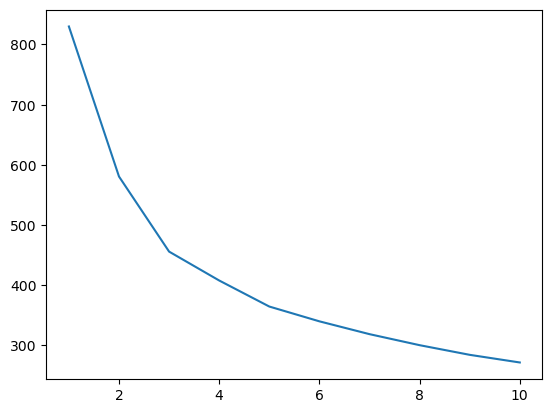

In [336]:
plt.plot(range(1,11), wss)

In [337]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df1)
labels = k_means.labels_

In [338]:
df1["Clus_kmeans"] = labels
df1.head(5)

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,0.152420,0.551264,0.6074,0,0.241704,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,0.263844,0.185462,0.5725,1,0.555761,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,0
2,0.091452,0.585156,0.5680,0,0.598798,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,0.025443,0.679348,0.4436,0,0.033498,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,1
4,0.117209,0.663264,0.4588,0,0.740490,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [339]:
silhouette_score(df1,labels)

0.6653696858031546

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>

**Interpretation**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

Here, the silhoutte score is 0.66 which tells us that the clusters are decently separated


In [340]:
pd.set_option('display.max_columns', None)

kmeans_data=df1.groupby('Clus_kmeans').mean()
kmeans_data['Freq']=df1.Clus_kmeans.value_counts().sort_index()
kmeans_data

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,
0,0.270084,0.105692,0.450531,1.0,0.072316,0.655328,0.201772,0.637032,0.161196,0.269726,0.087405,0.890567,0.679995,0.127539,0.073271,0.117542,0.001653,0.888353,0.491009,236
1,0.098333,0.197973,0.411650,0.0,0.019487,0.891847,0.100504,0.627769,0.271727,0.222415,0.047937,0.940278,0.649847,0.147412,0.099182,0.101450,0.002109,0.931915,0.394147,2959


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>

**Insights**
Two clusters are formed:
Cluster '1' - not underPoverty
Cluster '0' - underPoverty

**-- about cluster '1'--**

Zipcodes under this cluster are not under poverty and is evident from the fact that 
1. less proportion of zipcodes are below poverty line (9.8%)
2. are white Majority (89%)
3. have higher proportion of people with educatione level higher than bachelors(27%)
4. has less drop out rate (4.7%)
5. more employed proportion (94%) and
6. more insured proportion (93%) as compared to cluster '1'
7. the income per capita 

additionally most zipcodes belong to this cluster (92.6%)

**--interesting observation--**
1. the mean of Income gini index (which tells about income inequality) is almost the similar for two clusters
2. the high school education proprtion is almost similar both the clusters
3. the employment in private sector is more for zipcodes in cluster '0' 
4. the zipcodes in cluster '0' spend more proportion of their income on housing rent 


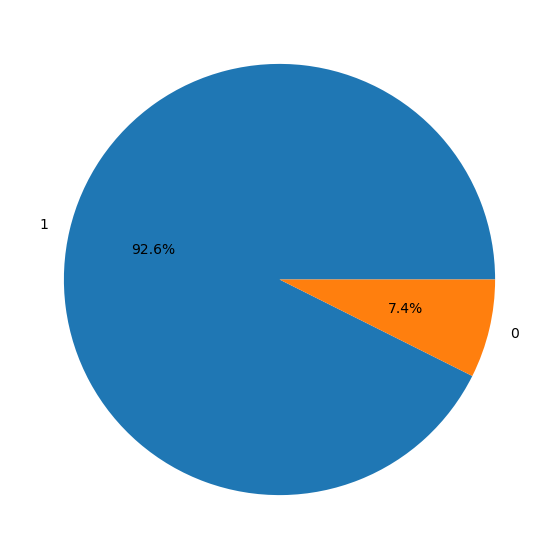

In [342]:
plt.figure(figsize= (7,7))
plt.pie(df1['Clus_kmeans'].value_counts(), labels = df1['Clus_kmeans'].value_counts().index,autopct= '%1.1f%%')
plt.show()

In [343]:
df1.head()

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,0.152420,0.551264,0.6074,0,0.241704,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,0.263844,0.185462,0.5725,1,0.555761,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,0
2,0.091452,0.585156,0.5680,0,0.598798,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,0.025443,0.679348,0.4436,0,0.033498,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,1
4,0.117209,0.663264,0.4588,0,0.740490,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [344]:
#df1 = pd.concat([df_zipcodes, df], axis=1)


In [345]:
df["Clus_kmeans"] = labels

In [346]:
df.shape

(3195, 21)

In [347]:
df.head()

,zip_code,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,10001,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,10002,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,0
2,10003,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,10004,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,1
4,10005,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [348]:
df.to_csv("./clusteredOutput.csv")

## Cluster Visualisation

In [349]:
# Define the color and symbol maps
cluster_map = {0: '0', 1: '1'}
symbol_map = {0: 'cross', 1: 'square'}

# Create dropdown widgets for x and y axis variables
x_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='X Axis')
y_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Y Axis')

# Define function to create the scatter plot
def scatterplot(x_var, y_var):
    # Calculate the symbol and color indices based on Clus_kmeans values
    df['symbol_idx'] = df['Clus_kmeans'].apply(lambda x: symbol_map[x])
    df['cluster_map_idx'] = df['Clus_kmeans'].apply(lambda x: cluster_map[x])
    
    fig = px.scatter(df, x=x_var, y=y_var, color='cluster_map_idx', symbol='symbol_idx', 
                     hover_data=['zip_code', 'Clus_kmeans'], 
                     color_discrete_map=color_map, symbol_map=symbol_map)
    fig.show()
    
# Create interactive plot using the scatterplot function and the dropdown widgets
interactive_plot = interact(scatterplot, x_var=x_var_dropdown, y_var=y_var_dropdown)

# Display the interactive plot
interactive_plot


interactive(children=(Dropdown(description='X Axis', options=('incomePerCapita', 'incomeGiniIndex', 'underPove…

<function __main__.scatterplot(x_var, y_var)>

## Poverty visualisation

In [350]:
df.head()

,zip_code,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans,symbol_idx,cluster_map_idx
0,10001,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1,square,1
1,10002,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,0,cross,0
2,10003,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1,square,1
3,10004,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,1,square,1
4,10005,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1,square,1


In [351]:
# Create dropdown widgets for x and y axis variables
x_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='X Axis')
y_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Y Axis')

# Define function to create the scatter plot
def scatterplot(x_var, y_var):
    fig = px.scatter(df, x=x_var, y=y_var, color='underPoverty', hover_data=['zip_code'])
    fig.show()
    
# Create interactive plot using the scatterplot function and the dropdown widgets
interactive_plot = interact(scatterplot, x_var=x_var_dropdown, y_var=y_var_dropdown)

# Display the interactive plot
interactive_plot


interactive(children=(Dropdown(description='X Axis', options=('incomePerCapita', 'incomeGiniIndex', 'underPove…

<function __main__.scatterplot(x_var, y_var)>

## Agglomerative clustering

In [352]:
df2.head()

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,0.152420,0.551264,0.6074,0,0.241704,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,0.263844,0.185462,0.5725,1,0.555761,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,0.091452,0.585156,0.5680,0,0.598798,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,0.025443,0.679348,0.4436,0,0.033498,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,0.117209,0.663264,0.4588,0,0.740490,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [353]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df2)
print(Cluster_agglo)

[0 1 0 ... 0 0 0]


In [354]:
df2["Agglo_Clusters"]=Cluster_agglo

In [355]:
df2.head()

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Agglo_Clusters
0,0.152420,0.551264,0.6074,0,0.241704,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,0
1,0.263844,0.185462,0.5725,1,0.555761,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,1
2,0.091452,0.585156,0.5680,0,0.598798,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,0
3,0.025443,0.679348,0.4436,0,0.033498,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,0
4,0.117209,0.663264,0.4588,0,0.740490,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,0


In [356]:
df2.Agglo_Clusters.value_counts().sort_index()

0    2959
1     236
Name: Agglo_Clusters, dtype: int64

In [357]:
agglo_data=df2.groupby('Agglo_Clusters').mean()
agglo_data['Freq']=df2.Agglo_Clusters.value_counts().sort_index()
agglo_data

,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Freq
Agglo_Clusters,,,,,,,,,,,,,,,,,,,,
0,0.098333,0.197973,0.411650,0.0,0.019487,0.891847,0.100504,0.627769,0.271727,0.222415,0.047937,0.940278,0.649847,0.147412,0.099182,0.101450,0.002109,0.931915,0.394147,2959
1,0.270084,0.105692,0.450531,1.0,0.072316,0.655328,0.201772,0.637032,0.161196,0.269726,0.087405,0.890567,0.679995,0.127539,0.073271,0.117542,0.001653,0.888353,0.491009,236


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        
**Insights**
Two clusters are formed:
Cluster '0' - not underPoverty
Cluster '1' - underPoverty

**-- about cluster '0'--**

Zipcodes under this cluster are not under poverty and is evident from the fact that 
1. less proportion of zipcodes are below poverty line (9.8%)
2. are white Majority (89%)
3. have higher proportion of people with education level higher than bachelors(27%)
4. has less drop out rate (4.7%)
5. more employed proportion (94%) and
6. more insured proportion (93%) as compared to cluster '1'

additionally most zipcodes belong to this cluster (92.6%)

**--interesting observation--**
1. the mean of Income gini index (which tells about income inequality) is almost the similar for two clusters
2. the high school education proprtion is almost similar both the clusters
3. the employment in private sector is more for zipcodes in cluster '1' 
4. the zipcodes in cluster '1' spend more proportion of their income on housing rent 
        
**Agglomerative clustering is giving almost the same result as k0means clustering**


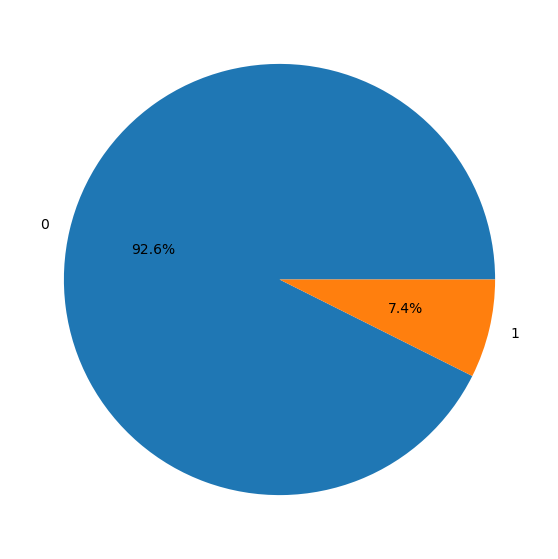

In [358]:
plt.figure(figsize= (7,7))
plt.pie(df2['Agglo_Clusters'].value_counts(), labels = df2['Agglo_Clusters'].value_counts().index,autopct= '%1.1f%%')
plt.show()

In [359]:
df2["Agglo_Clusters"] = labels

In [360]:
silhouette_score(df2,labels)

0.6653696858031546

In [361]:
df2 = pd.concat([df_zipcodes, df2], axis=1)
df2["Agglo_Clusters"] = labels

In [362]:
df2.head()

,zip_code,incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Agglo_Clusters
0,10001,0.152420,0.551264,0.6074,0,0.241704,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,10002,0.263844,0.185462,0.5725,1,0.555761,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,0
2,10003,0.091452,0.585156,0.5680,0,0.598798,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,10004,0.025443,0.679348,0.4436,0,0.033498,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,1
4,10005,0.117209,0.663264,0.4588,0,0.740490,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


## Mapping the cluster 0 zipcodes

In [363]:
# Assuming the DataFrame is named 'df' and the cluster column is named 'cluster'
cluster_0_zips = df[df['Clus_kmeans'] == 0]['zip_code'].tolist()
print(cluster_0_zips)
len(cluster_0_zips)

[10002, 10029, 10030, 10031, 10035, 10037, 10039, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10467, 10468, 10472, 10474, 10952, 10977, 11205, 11206, 11208, 11212, 11219, 11220, 11224, 11233, 11237, 11239, 11355, 11368, 12071, 12085, 12172, 12202, 12206, 12307, 12431, 12456, 12460, 12471, 12565, 12733, 12751, 12759, 12762, 12779, 12821, 12872, 12952, 12957, 12967, 13144, 13162, 13202, 13203, 13204, 13205, 13208, 13210, 13321, 13362, 13501, 13602, 13603, 13642, 13654, 13655, 13666, 13667, 13680, 13784, 13801, 14126, 14169, 14201, 14203, 14204, 14207, 14208, 14210, 14211, 14212, 14213, 14215, 14218, 14261, 14301, 14303, 14305, 14479, 14480, 14511, 14549, 14604, 14605, 14608, 14611, 14613, 14614, 14619, 14621, 14721, 14726, 14748, 14779, 14783, 14802, 14819, 14822, 14842, 14855, 14898, 14901, 15018, 15077, 15088, 15104, 15110, 15112, 15132, 15140, 15148, 15210, 15213, 15219, 15368, 15410, 15420, 15424, 15444, 15448, 15451, 15460, 15461, 15489, 15532, 15555, 15661

236

In [367]:
#this will take 2-5 minutes

import folium

# Define the center of the map
center = [40.7128, -74.0060] # Latitude, Longitude of New York City

# Create the map
map = folium.Map(location=center, zoom_start=10)

# Add a marker for each zip code in cluster 1
for zipcode in cluster_0_zips:
    # Use pgeocode to get the coordinates for the zipcode
    location = pgeocode.Nominatim('us').query_postal_code(zipcode)
    lat, lon = location.latitude, location.longitude
    
    # Add the marker to the map
    marker = folium.Marker(location=[lat, lon], tooltip=zipcode)
    marker.add_to(map)

# Display the map
map


In [316]:
underPoverty_zips = df[df['underPoverty'] == 1]['zip_code'].tolist()
print(underPoverty_zips)
len(underPoverty_zips)

[10002, 10029, 10030, 10031, 10035, 10037, 10039, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10467, 10468, 10472, 10474, 10952, 10977, 11205, 11206, 11208, 11212, 11219, 11220, 11224, 11233, 11237, 11239, 11355, 11368, 12071, 12085, 12172, 12202, 12206, 12307, 12431, 12456, 12460, 12471, 12565, 12733, 12751, 12759, 12762, 12779, 12821, 12872, 12952, 12957, 12967, 13144, 13162, 13202, 13203, 13204, 13205, 13208, 13210, 13321, 13362, 13501, 13602, 13603, 13642, 13654, 13655, 13666, 13667, 13680, 13784, 13801, 14126, 14169, 14201, 14203, 14204, 14207, 14208, 14210, 14211, 14212, 14213, 14215, 14218, 14261, 14301, 14303, 14305, 14479, 14480, 14511, 14549, 14604, 14605, 14608, 14611, 14613, 14614, 14619, 14621, 14721, 14726, 14748, 14779, 14783, 14802, 14819, 14822, 14842, 14855, 14898, 14901, 15018, 15077, 15088, 15104, 15110, 15112, 15132, 15140, 15148, 15210, 15213, 15219, 15368, 15410, 15420, 15424, 15444, 15448, 15451, 15460, 15461, 15489, 15532, 15555, 15661

236

## Kmeans visulaisation using PCA

In [ ]:
df.head()

In [ ]:
# df_pca_plt=df.copy()

In [ ]:
# df_pca_plt.head()

In [ ]:
# df_pca_plt.drop('zip_code',axis=1,inplace=True)

In [ ]:
# df_pca_plt.head()

In [ ]:
# df_pca_plt.drop('Clus_kmeans',axis=1,inplace=True)

In [ ]:
# df_pca_plt.head()

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

In [ ]:
# pca = PCA(n_components=9)
# scaler = StandardScaler()

In [ ]:
# X = scaler.fit_transform(df_pca_plt) #scaling the features
# X = pca.fit_transform(df_pca_plt)

In [ ]:
# k = 3  # Chosen number of clusters from elbow and silhouette plots
#         #should be repetaed for k=4
# kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=400)
# kmeans.fit(X)

# pred_labels = kmeans.predict(X)

# #X['labels'] = pred_labels
# df_pca_plt['labels'] = pred_labels

In [ ]:
# above_poverty_indices = np.where(df_pca_plt['underPoverty'] == 0)[0]
# under_poverty_indices = np.where(df_pca_plt['underPoverty'] == 1)[0]

In [ ]:
# plt.scatter(X[:, 0], X[:, 1], c=pred_labels)
# plt.scatter(X[above_poverty_indices, 0], X[above_poverty_indices, 1], s=100, marker='o', facecolors='none', edgecolors='r')
# plt.scatter(X[under_poverty_indices, 0], X[under_poverty_indices, 1], s=100, marker='o', facecolors='none', edgecolors='g')

Although there are no internationally defined standard cut-off values, it’s commonly recognized that Gini index<0.2 corresponds with perfect income equality, 0.2–0.3 corresponds with relative equality, 0.3–0.4 corresponds with a relatively reasonable income gap, 0.4–0.5 corresponds with high income disparity, above 0.5 corresponds with severe income disparity.